## Model training and predictions - Regression with Dataset_1_reg

In this script we trained a regression model using Dataset_1_reg, where NRAS inhibitors were target with pIC50 data

In [1]:
import subprocess
import numpy as np
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Model training 

To perform the model train we use: *train_reg.sh* (see file in this folder)

- **Dataset_1_reg.csv** : Dataset with 578 compounds with inhibitory activity against NRAS with pIC50 data.
- **--target_columns pIC50** : pIC50 data.
- **--features_generator rdkit_2d_normalized --no_features_scaling** : pre-normalized RDKit features
- **--save_smiles_splits** : By default, random split the data into 80% train, 10% validation, and 10% test. With these line we can save the 

three datasets used, to further study of the results obtained. The diferents dataset are stored in *'test_checkpoints_class/fold_0'* :

1. Train data : "train_full" (smiles + pIC50) / "train_smiles" (only smiles)
2. Validation data : "val_full" (smiles + pIC50) / "val_smiles" (only smiles)
3. Test data : "test_full" (smiles + pIC50) / "test_smiles" (only smiles)

The model is trained for 30 epochs.
The default metric for regression is RMSE.

In [2]:
path = "./train_reg.sh"
subprocess.run(["sh",path])

Command line
python /Users/catalina/opt/anaconda3/bin/chemprop_train --data_path ../Data/Dataset_2.csv --dataset_type regression --save_dir test_checkpoints_reg --target_columns pIC50 --features_generator rdkit_2d_normalized --no_features_scaling --save_smiles_splits
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': '../Data/Dataset_2.csv

CompletedProcess(args=['sh', './train_reg.sh'], returncode=1)

### Evaluate the model on test data.

Now that we have trained the model, the next step is to evaluate its performance on a test dataset (the split one).

With *train_pred_class.sh* :

chemprop_predict \
    --test_path test_checkpoints_class/fold_0/test_smiles.csv \
    --preds_path test_preds_reg.csv \
    --checkpoint_dir test_checkpoints_class \
    --features_generator rdkit_2d_normalized --no_features_scaling

- **test_preds_reg.csv** : predictions for the compounds in our test dataset

In [3]:
path = "./train_pred_reg.sh"
subprocess.run(["sh",path])

Loading training args
Setting molecule featurization parameters to default.
Loading data


58it [00:00, 31001.61it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Validating SMILES
Test size = 58
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:32<00:00, 32.61s/it]


Saving predictions to test_preds_reg.csv
Elapsed time = 0:00:41


CompletedProcess(args=['sh', './train_pred_reg.sh'], returncode=0)

### Test predictions representation

Representation of the regression model's performance on the test data. The graph illustrates the correlation between true values and the model's predictions.

In [4]:
#load real pIC50 classification
df_true = pd.read_csv('test_checkpoints_reg/fold_0/test_full.csv')
print(df_true.columns)
print(len(df_true))

Index(['SMILES', 'pIC50'], dtype='object')
58


In [5]:
#load predicted values
df_preds = pd.read_csv('test_preds_reg.csv')
print(df_preds.columns)

#column renaming to better manage data
df_preds.rename(columns={'pIC50': 'preds'}, inplace=True)
print(df_preds.columns)
print(df_preds)

Index(['SMILES', 'pIC50'], dtype='object')
Index(['SMILES', 'preds'], dtype='object')
                                               SMILES     preds
0   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.387793
1   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.407560
2   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.389182
3   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.377290
4   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.481808
5   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.779475
6   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.560230
7   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.492457
8   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.491782
9   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.469603
10  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...  6.452572
11  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.495080
12  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.453442
13  CCn1c(c2CC(C)(

In [6]:
#combination of the two data sets
df = df_true.merge(df_preds, on='SMILES', how='inner')

print(df)
print(len(df))

                                               SMILES     pIC50     preds
0   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.387793
1   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.407560
2   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.389182
3   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.377290
4   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.481808
5   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.779475
6   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  5.259637  6.560230
7   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.492457
8   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.491782
9   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.469603
10  CO[C@@H](C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3...  7.259637  6.452572
11  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  7.259637  6.495080
12  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN

In [7]:
#representation

def plot_parity(y_true, y_pred, y_pred_unc=None):
    
    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)
    
    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))
    
    ax = plt.gca()
    ax.set_aspect('equal')
    
    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    
    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')
    plt.title('Regression')

    plt.savefig('../Results/Figures/reg1.png', dpi=300) # saving the plot
    
    plt.show()
    
    return

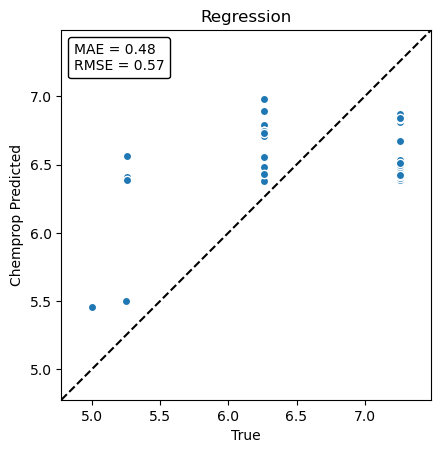

In [8]:
plot_parity(df.pIC50, df.preds)